문제: [2.2. KRX 전체 종목분석](https://github.com/corazzon/finance-data-analysis/blob/main/2.2.%20KRX%20%EC%A0%84%EC%B2%B4%20%EC%A2%85%EB%AA%A9%EB%B6%84%EC%84%9D-input.ipynb)  
참고자료: [Pandas_Cheat_Sheet.pdf](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

In [2]:
# 기본 세팅
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## 데이터 다루기

In [3]:
# 데이터 불러오기
krx = pd.read_csv("data/krx_list.csv")
krx["ListingDate"] = pd.to_datetime(krx["ListingDate"])

In [20]:
# 데이터 샘플 확인
print(krx.head(5))
print(krx.tail(5))
print(krx.sample(5))

   Symbol  Market    Name           Sector             Industry ListingDate  \
0  060310  KOSDAQ      3S    특수 목적용 기계 제조업          반도체 웨이퍼 캐리어  2002-04-23   
1  095570   KOSPI  AJ네트웍스  산업용 기계 및 장비 임대업  렌탈(파렛트, OA장비, 건설장비)  2015-08-21   
2  006840   KOSPI   AK홀딩스           기타 금융업                 지주사업  1999-08-11   
3  054620  KOSDAQ  APS홀딩스           기타 금융업          인터넷 트래픽 솔루션  2001-12-04   
4  265520  KOSDAQ   AP시스템    특수 목적용 기계 제조업          디스플레이 제조 장비  2017-04-07   

  SettleMonth      Representative                       HomePage Region  
0         03월  박종익, 김세완 (각자 대표이사)           http://www.3sref.com  서울특별시  
1         12월                 이현우         http://www.ajnet.co.kr  서울특별시  
2         12월   채형석, 이석주(각자 대표이사)  http://www.aekyunggroup.co.kr  서울특별시  
3         12월                 정기로   http://www.apsholdings.co.kr    경기도  
4         12월                 김영주     http://www.apsystems.co.kr    경기도  
      Symbol  Market     Name                    Sector  \
6662  000547   KOSPI  

In [21]:
# 데이터 요약 확인
print(krx.info())
print(krx.describe())
print(krx.nunique()) # 전체 유니크값 수
print(krx["Market"].nunique()) # 항목별 유니크값 수
print(krx["Market"].unique()) # 항목 종류(중복 표시 안 함)
print(krx.index) # 단순 범위값이라 index.name=None
print(krx.columns)
# print(krx.values.tolist()) # 값을 배열로 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6667 entries, 0 to 6666
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Symbol          6667 non-null   object        
 1   Market          6667 non-null   object        
 2   Name            6667 non-null   object        
 3   Sector          2412 non-null   object        
 4   Industry        2393 non-null   object        
 5   ListingDate     2412 non-null   datetime64[ns]
 6   SettleMonth     2412 non-null   object        
 7   Representative  2412 non-null   object        
 8   HomePage        2239 non-null   object        
 9   Region          2412 non-null   object        
dtypes: datetime64[ns](1), object(9)
memory usage: 521.0+ KB
None
        Symbol Market          Name         Sector Industry  \
count     6667   6667          6667           2412     2393   
unique    6667      3          6667            158     2241   
top     58FA74

In [5]:
# 데이터 색인
## Series
krx_name = krx["Name"]
print(type(krx_name))
print(krx_name.loc[0])
print(type(krx_name.loc[0]))

## DataFrame
print(type(krx))
print(krx[["Market","Name"]])
print(krx.loc[[0,1,2]])
print(krx[["Market","Name"]].loc[[0,1,2]])
print(krx[["Name"]])
print(type(krx[["Name"]]))

## loc를 통한 서브셋 가져오기
print(krx.loc[0, "Name"])
print(krx.loc[[0,1], "Name"])
print(krx.loc[0, ["Market","Name"]])
print(krx.loc[[0,1], ["Market","Name"]])

## Boolean Indexing
print(krx.loc[ krx["Name"] == "카카오" ])
print(krx.loc[ (krx["Region"] == "서울특별시") & (krx["Market"] == "KOSPI"), ["Symbol","Name"] ])

# 파생변수 생성
## (pd.to_datetime은 원본의 날짜 타입을 유지하기 위해 이미 사용됨)
krx["ListingYear"] = krx["ListingDate"].dt.year
print(krx[["ListingDate","ListingYear"]])

<class 'pandas.core.series.Series'>
3S
<class 'str'>
<class 'pandas.core.frame.DataFrame'>
      Market     Name
0     KOSDAQ       3S
1      KOSPI   AJ네트웍스
2      KOSPI    AK홀딩스
3     KOSDAQ   APS홀딩스
4     KOSDAQ    AP시스템
...      ...      ...
6662   KOSPI  흥국화재2우B
6663   KOSPI    흥국화재우
6664   KOSPI     흥아해운
6665  KOSDAQ       희림
6666  KOSDAQ       힘스

[6667 rows x 2 columns]
   Symbol  Market    Name           Sector             Industry ListingDate  \
0  060310  KOSDAQ      3S    특수 목적용 기계 제조업          반도체 웨이퍼 캐리어  2002-04-23   
1  095570   KOSPI  AJ네트웍스  산업용 기계 및 장비 임대업  렌탈(파렛트, OA장비, 건설장비)  2015-08-21   
2  006840   KOSPI   AK홀딩스           기타 금융업                 지주사업  1999-08-11   

  SettleMonth      Representative                       HomePage Region  \
0         03월  박종익, 김세완 (각자 대표이사)           http://www.3sref.com  서울특별시   
1         12월                 이현우         http://www.ajnet.co.kr  서울특별시   
2         12월   채형석, 이석주(각자 대표이사)  http://www.aekyunggroup.co.kr  서울특별시   

  

## 데이터 시각화

In [7]:
# 데이터 시각화 사전설정
def get_font_family():
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야합니다.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨집니다.
        !apt-get update -qq # jupyter notebook 명령
        !apt-get install fonts-nanum -qq  > /dev/null # jupyter notebook 명령

        import matplotlib.font_manager as fm
        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

font_family = get_font_family()
sns.set(font=font_family)
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina' # jupyter notebook 명령

KOSPI     5031
KOSDAQ    1494
KONEX      142
Name: Market, dtype: int64


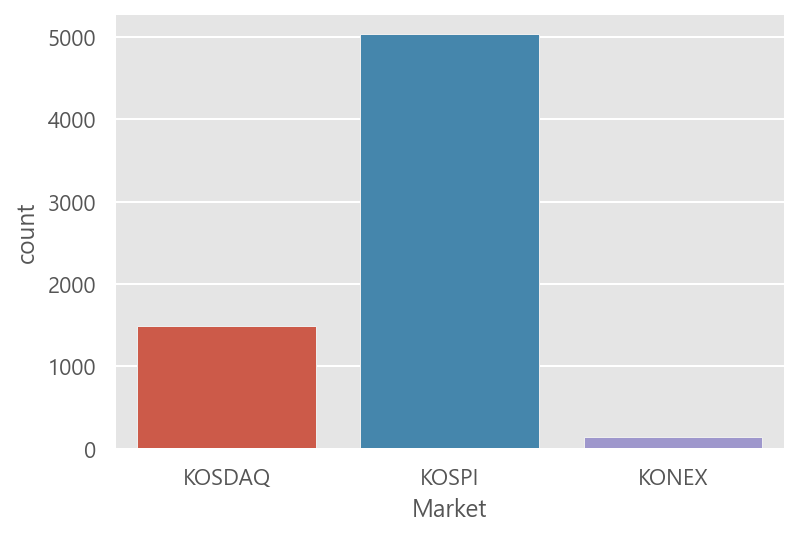

특수 목적용 기계 제조업        141
소프트웨어 개발 및 공급업       135
전자부품 제조업             121
자동차 신품 부품 제조업         97
기타 금융업                93
                    ... 
담배 제조업                 1
자동차 차체 및 트레일러 제조업      1
철도장비 제조업               1
컴퓨터 및 통신장비 수리업         1
기타 생활용품 소매업            1
Name: Sector, Length: 158, dtype: int64


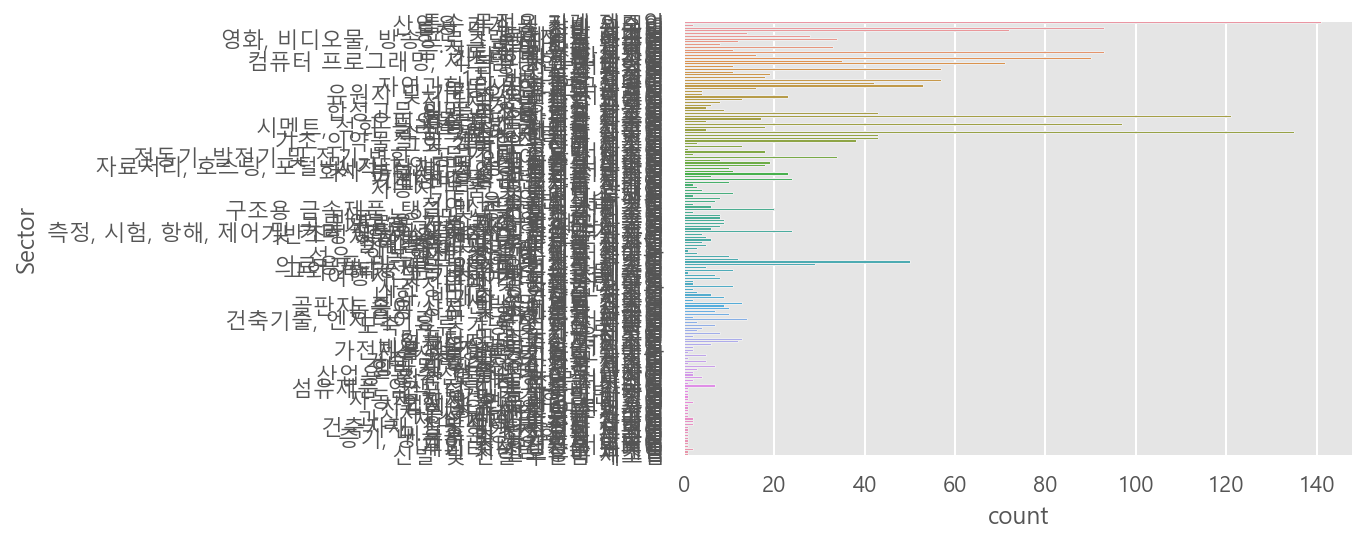

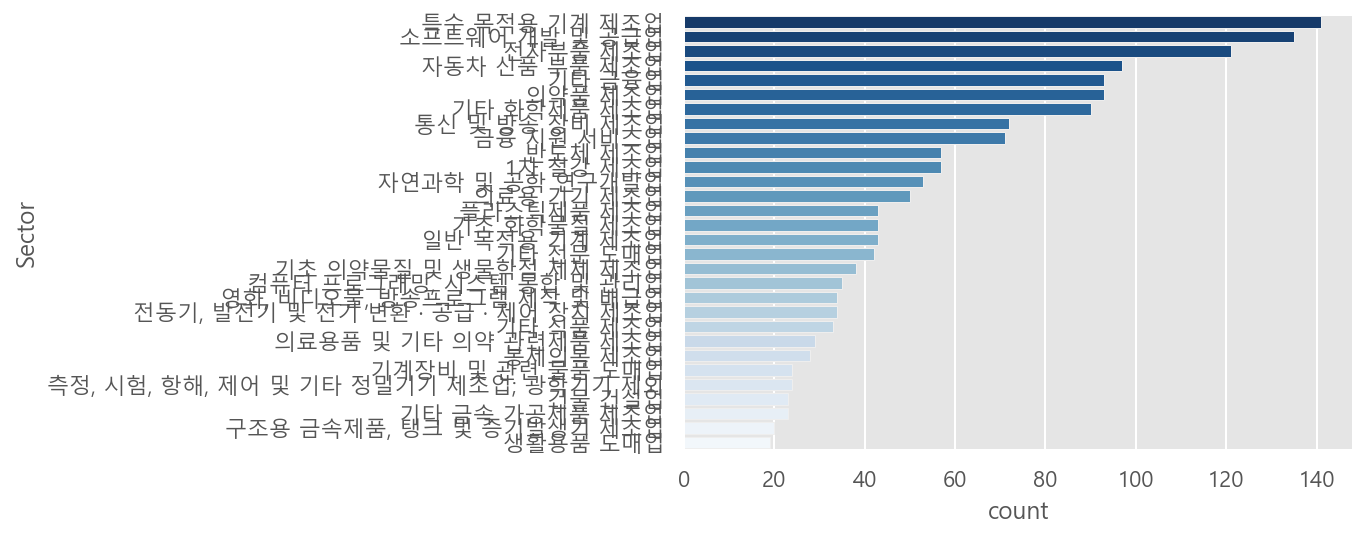

      Symbol  Market     Name         Sector  \
0     060310  KOSDAQ       3S  특수 목적용 기계 제조업   
4     265520  KOSDAQ    AP시스템  특수 목적용 기계 제조업   
79    068790  KOSDAQ      DMS  특수 목적용 기계 제조업   
99    083450  KOSDAQ      GST  특수 목적용 기계 제조업   
122   078150  KOSDAQ  HB테크놀러지  특수 목적용 기계 제조업   
...      ...     ...      ...            ...   
6627  010660   KOSPI     화천기계  특수 목적용 기계 제조업   
6628  000850   KOSPI     화천기공  특수 목적용 기계 제조업   
6644  090710  KOSDAQ     휴림로봇  특수 목적용 기계 제조업   
6658  010240  KOSDAQ       흥국  특수 목적용 기계 제조업   
6666  238490  KOSDAQ       힘스  특수 목적용 기계 제조업   

                                               Industry ListingDate  \
0                                           반도체 웨이퍼 캐리어  2002-04-23   
4                                           디스플레이 제조 장비  2017-04-07   
79                                             LCD 제조장비  2004-10-01   
99                                  GasScrubber,Chiller  2006-02-01   
122                                         TFT-LCD검사장비  2004-12-08 

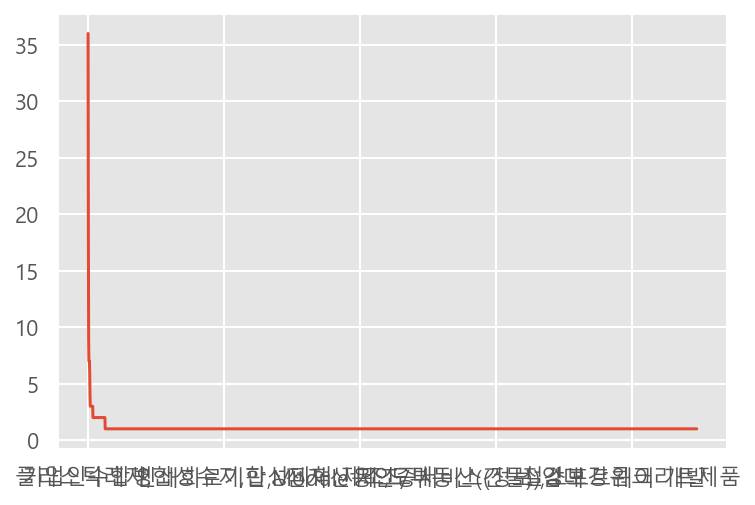

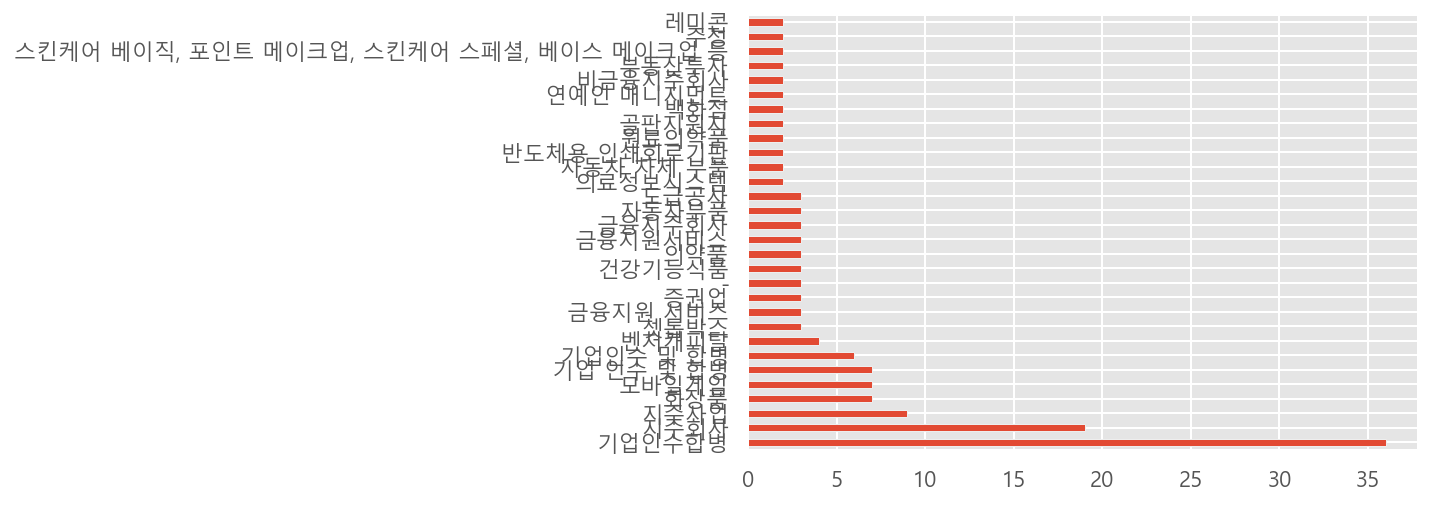

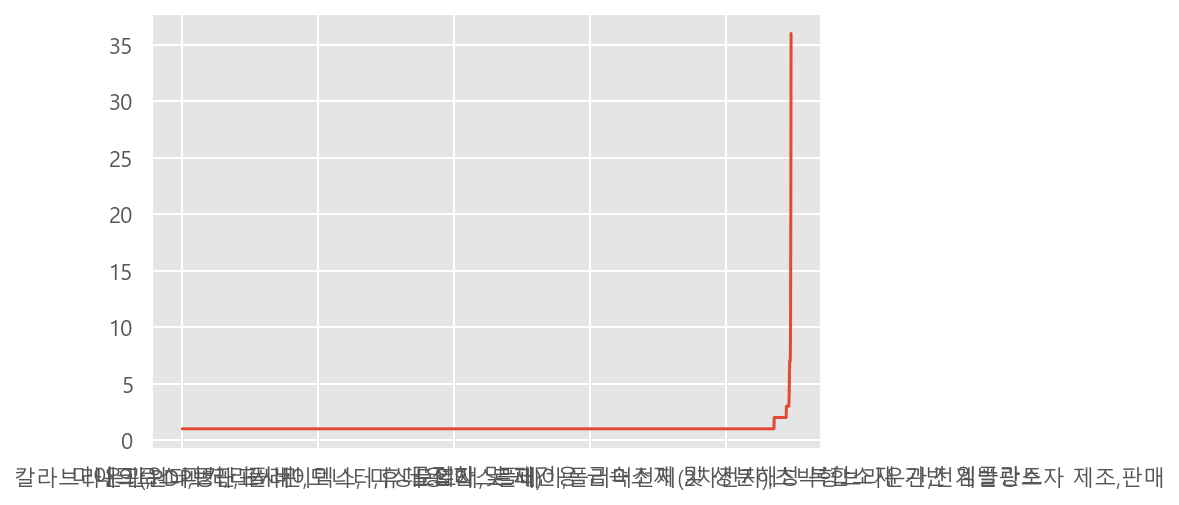

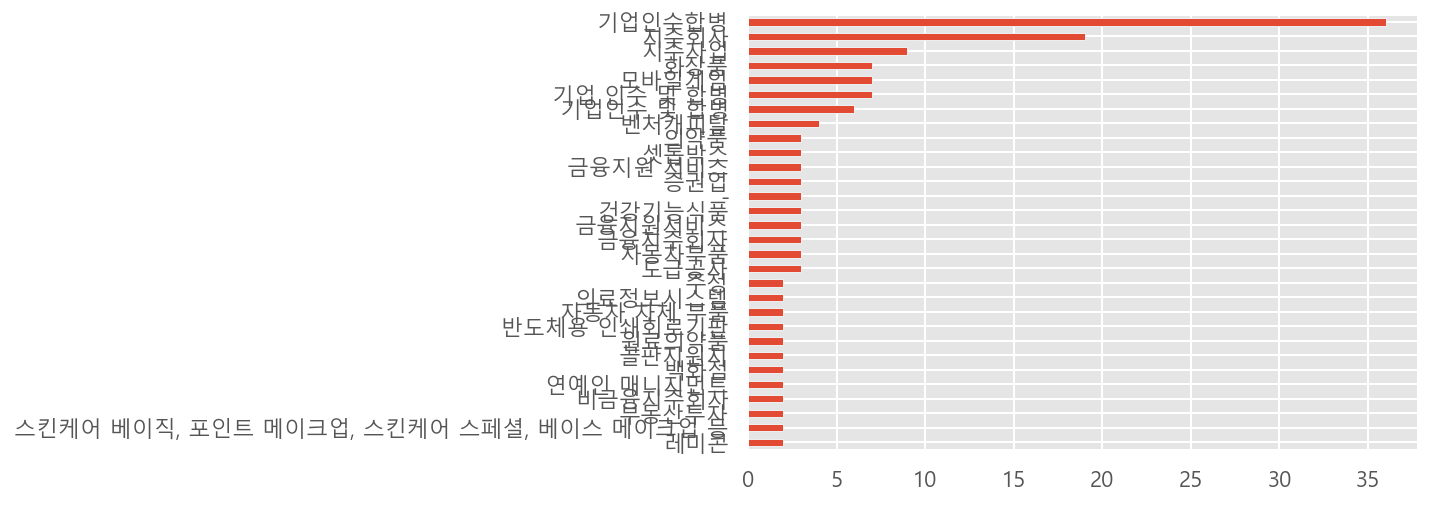

서울특별시      972
경기도        674
충청남도        92
경상남도        89
인천광역시       86
충청북도        82
부산광역시       76
경상북도        64
대구광역시       56
대전광역시       53
강원도         27
전라북도        27
울산광역시       26
광주광역시       24
전라남도        23
제주특별자치도     10
세종특별자치시      9
홍콩           9
케이맨 제도       5
미국           5
일본           3
Name: Region, dtype: int64


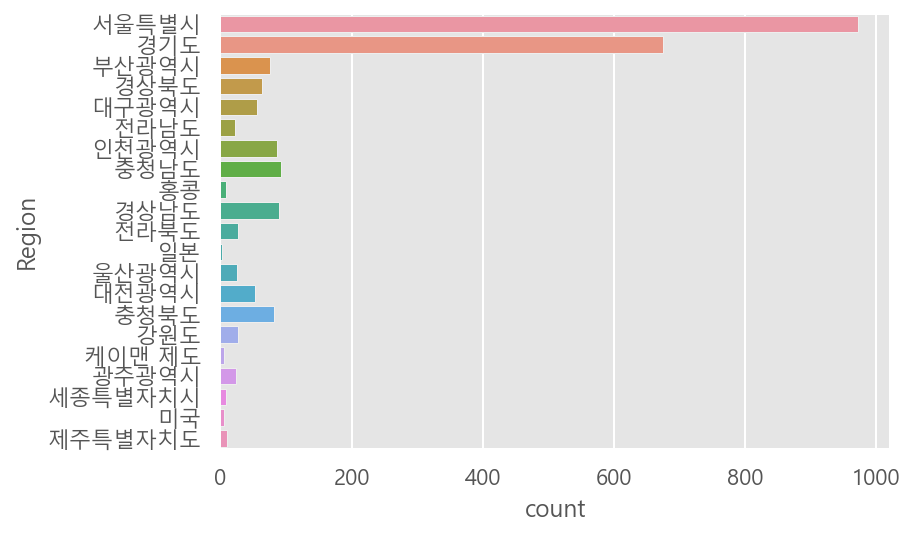

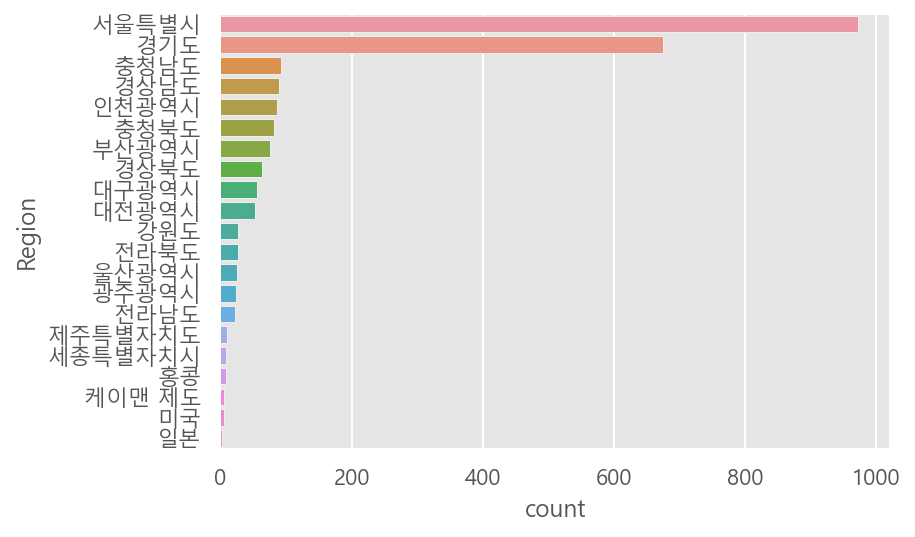

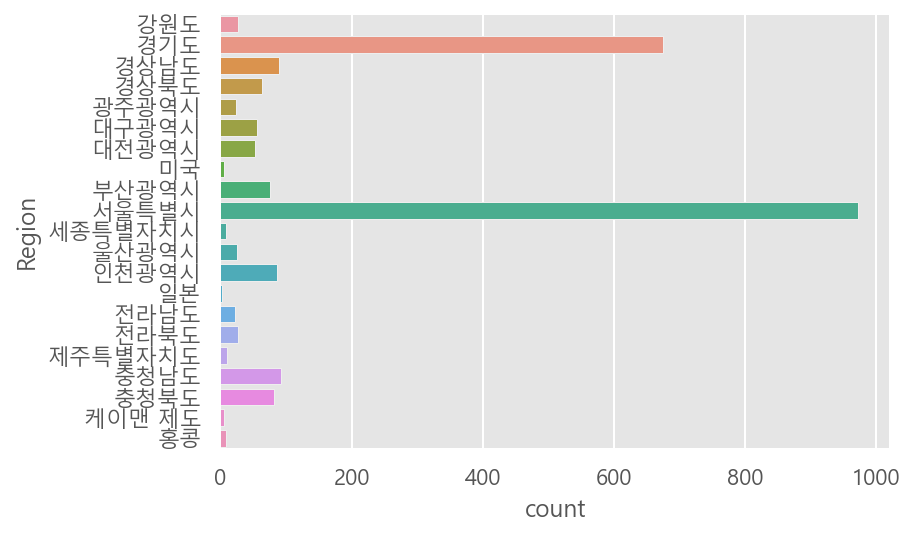

In [13]:
# 한 개의 변수 빈도수 구하고 시각화 하기
## Market
print(krx["Market"].value_counts())
sns.countplot(x="Market", data=krx)
plt.show()

## Sector
print(krx["Sector"].value_counts())
sector_count_top = krx["Sector"].value_counts().nlargest(30)
sns.countplot(y="Sector", data=krx)
plt.show()
sns.countplot(y="Sector", data=krx[ krx["Sector"].isin(sector_count_top.index) ], order=sector_count_top.index, palette="Blues_r") # 답안지에서 생각한 방식
plt.show()
print(krx[ krx["Sector"] == "특수 목적용 기계 제조업" ])

## Industry
print(krx["Industry"].value_counts())
krx["Industry"].value_counts().plot() # plot(kind="bar")일 경우 bar 그래프 출력, 이번 경우 bar로 하면 항목이 너무 많아서 속도 느림
plt.show()
krx["Industry"].value_counts().head(30).plot(kind="barh") # 답안지에서 생각한 방식
plt.show()
krx["Industry"].value_counts().sort_values(ascending=True).plot() # sort_values() 없이 value_counts(ascending=True)로 통합 가능
plt.show()
krx["Industry"].value_counts().head(30).sort_values(ascending=True).plot(kind="barh") # 답안지에서 생각한 방식
plt.show()

## Region
print(krx["Region"].value_counts())
sns.countplot(y="Region", data=krx)
plt.show()
sns.countplot(y="Region", data=krx, order=krx["Region"].value_counts().index)
plt.show()
sns.countplot(y="Region", data=krx.sort_values(by="Region"))
plt.show()

Market   KONEX  KOSDAQ  KOSPI
Region                       
강원도          7      16      4
경기도         37     492    145
경상남도         0      49     40
경상북도         7      38     19
광주광역시        6       9      9
대구광역시        1      34     21
대전광역시        7      38      8
미국           0       5      0
부산광역시        1      38     37
서울특별시       54     510    408
세종특별자치시      1       5      3
울산광역시        0      10     16
인천광역시        4      57     25
일본           0       3      0
전라남도         3      13      7
전라북도         1      15     11
제주특별자치도      1       2      7
충청남도         3      63     26
충청북도         9      59     14
케이맨 제도       0       4      1
홍콩           0       9      0


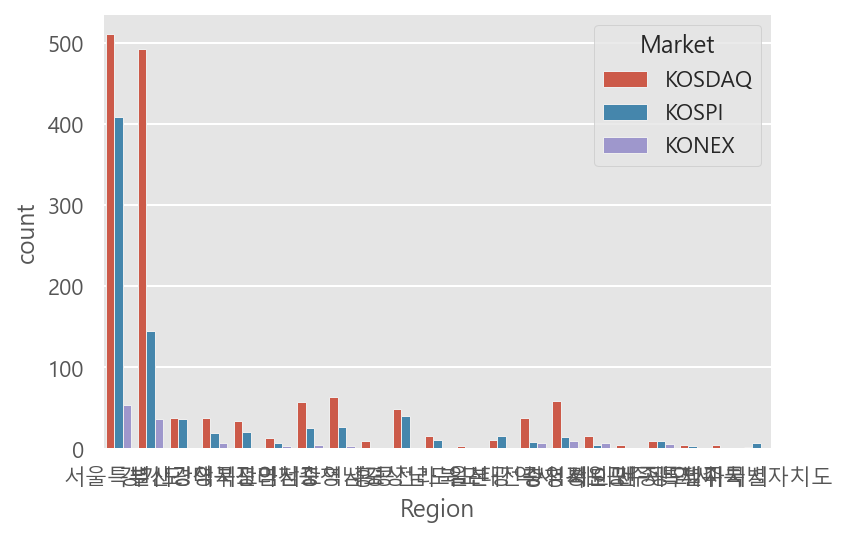

Market       KONEX  KOSDAQ  KOSPI
ListingYear                      
1956.0           0       0      5
1962.0           0       0      1
1964.0           0       0      1
1966.0           0       0      1
1968.0           0       0      6
1969.0           0       0      5
1970.0           0       0      4
1971.0           0       0      1
1972.0           0       0      3
1973.0           0       0     22
1974.0           0       0     11
1975.0           0       0     31
1976.0           0       0     51
1977.0           0       0     17
1978.0           0       0     10
1979.0           0       0      3
1980.0           0       0      1
1981.0           0       0      1
1983.0           0       0      1
1984.0           0       0      5
1985.0           0       0      8
1986.0           0       0      8
1987.0           0       0     21
1988.0           0       0     52
1989.0           0       5     52
1990.0           0       2     21
1991.0           0       4     11
1992.0        

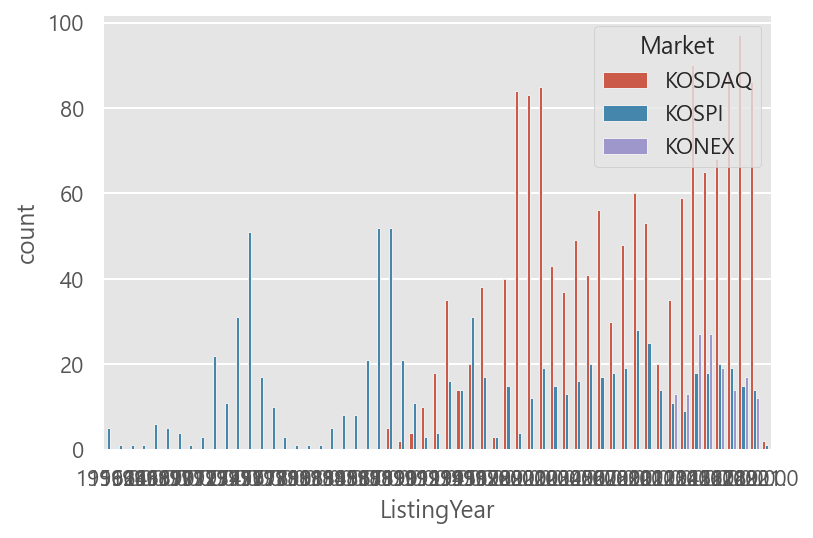

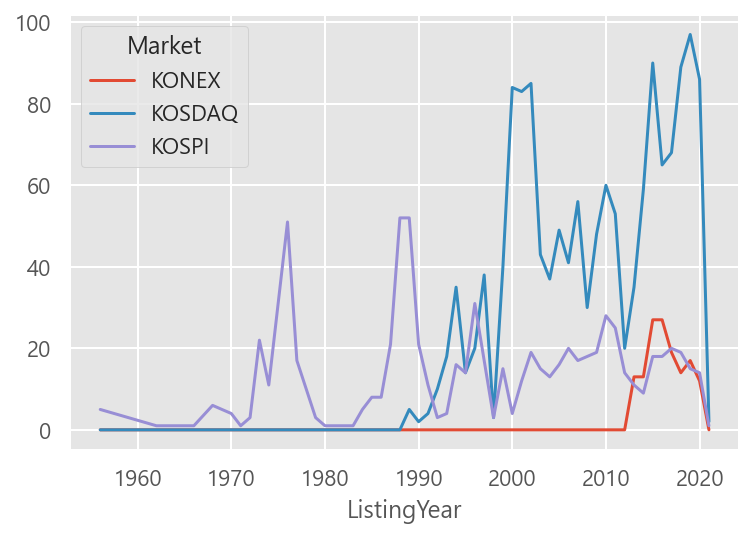

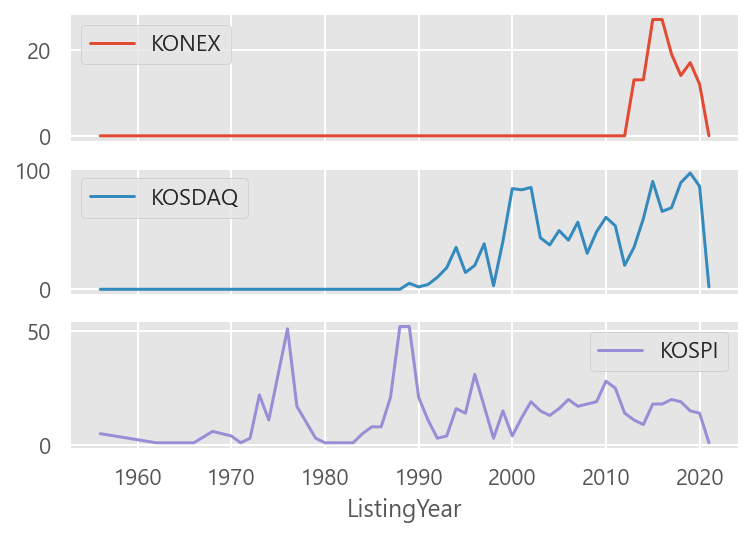

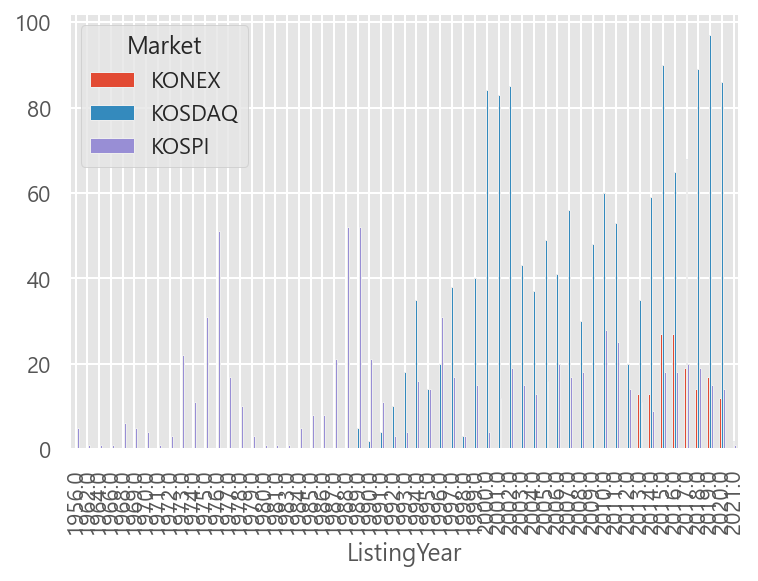

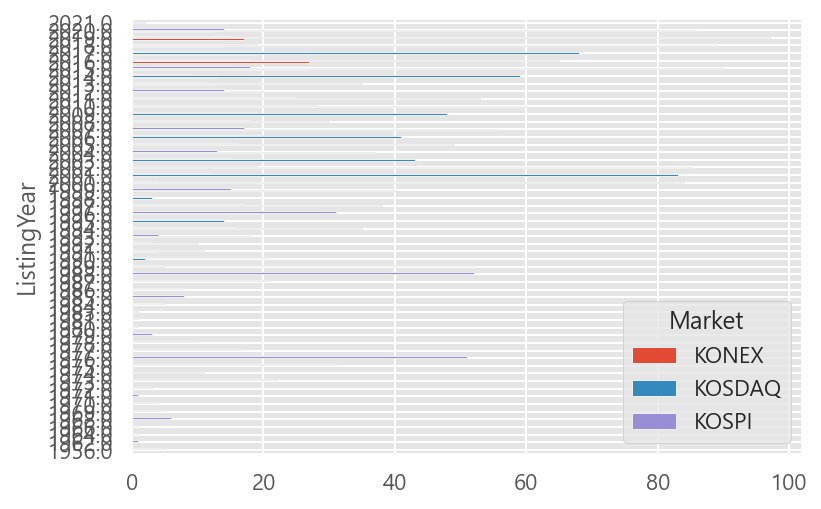

Int64Index([1956, 1962, 1964, 1966, 1968, 1969, 1970, 1971, 1972, 1973, 1974,
            1975, 1976, 1977, 1978, 1979, 1980, 1981, 1983, 1984, 1985, 1986,
            1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
            1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
            2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
            2020, 2021],
           dtype='int64', name='ListingYear')


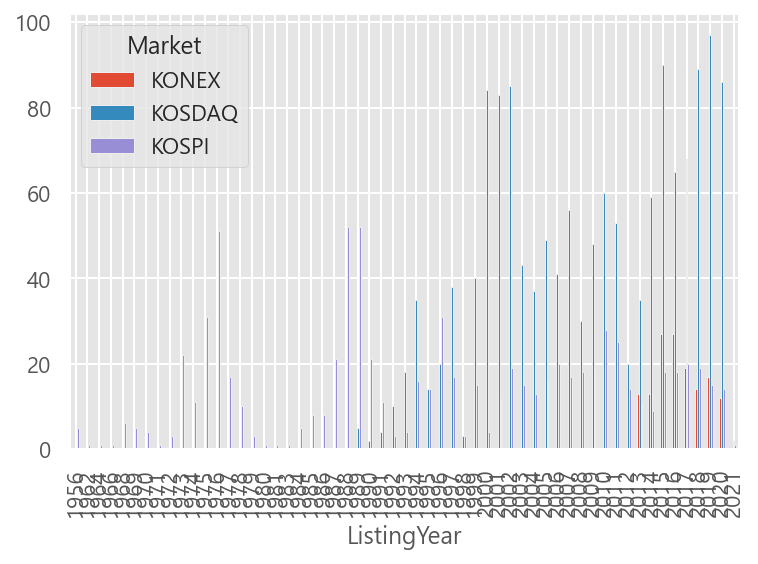

    ListingYear  Size
0        1956.0     5
1        1962.0     1
2        1964.0     1
3        1966.0     1
4        1968.0     6
5        1969.0     5
6        1970.0     4
7        1971.0     1
8        1972.0     3
9        1973.0    22
10       1974.0    11
11       1975.0    31
12       1976.0    51
13       1977.0    17
14       1978.0    10
15       1979.0     3
16       1980.0     1
17       1981.0     1
18       1983.0     1
19       1984.0     5
20       1985.0     8
21       1986.0     8
22       1987.0    21
23       1988.0    52
24       1989.0    57
25       1990.0    23
26       1991.0    15
27       1992.0    13
28       1993.0    22
29       1994.0    51
30       1995.0    28
31       1996.0    51
32       1997.0    55
33       1998.0     6
34       1999.0    55
35       2000.0    88
36       2001.0    95
37       2002.0   104
38       2003.0    58
39       2004.0    50
40       2005.0    65
41       2006.0    61
42       2007.0    73
43       2008.0    48
44       2

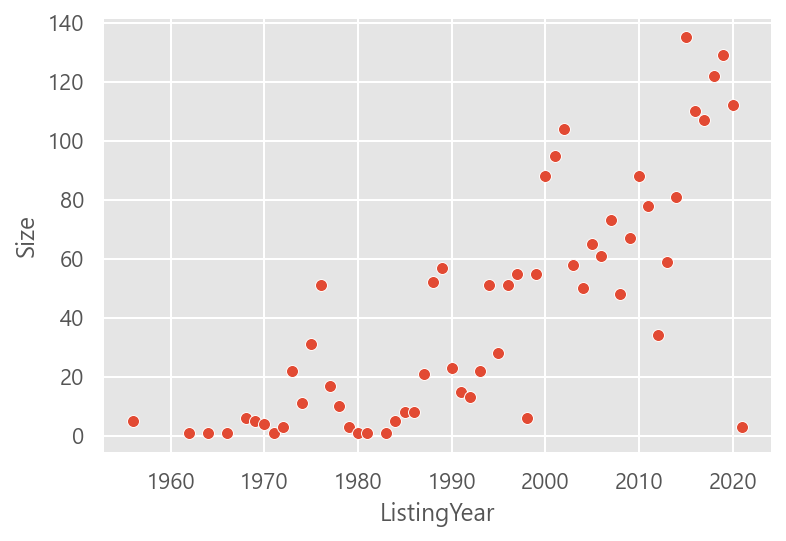

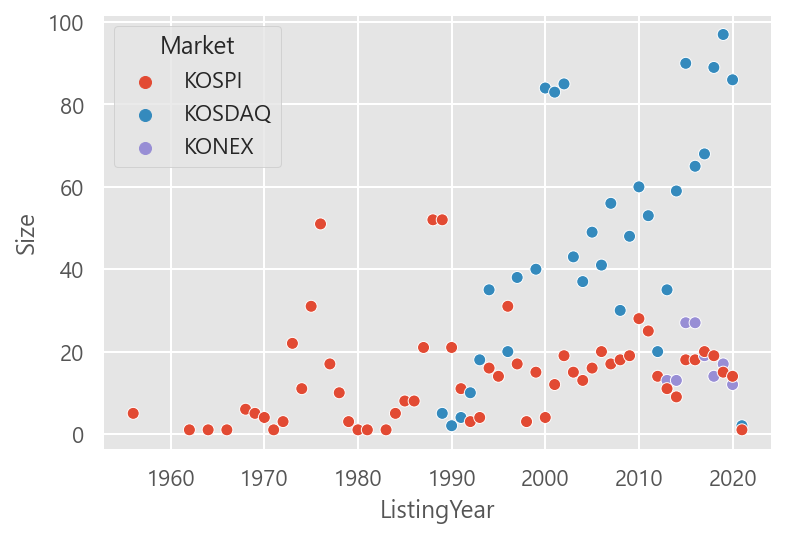

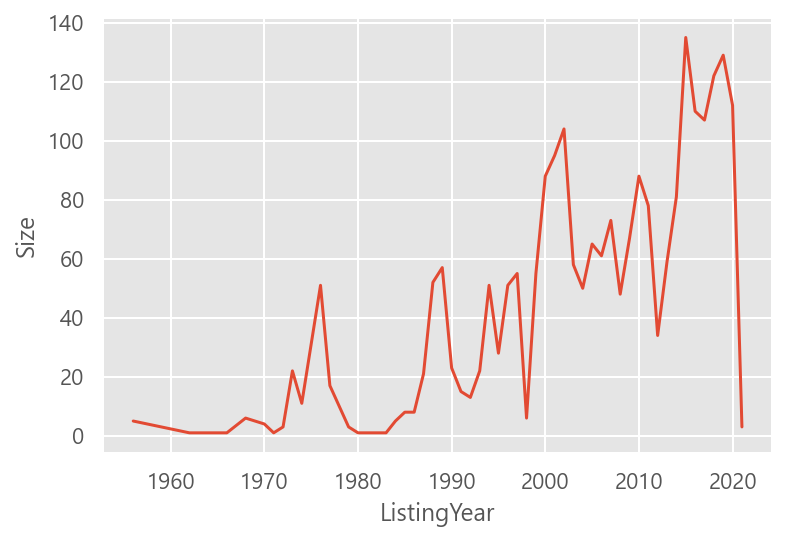

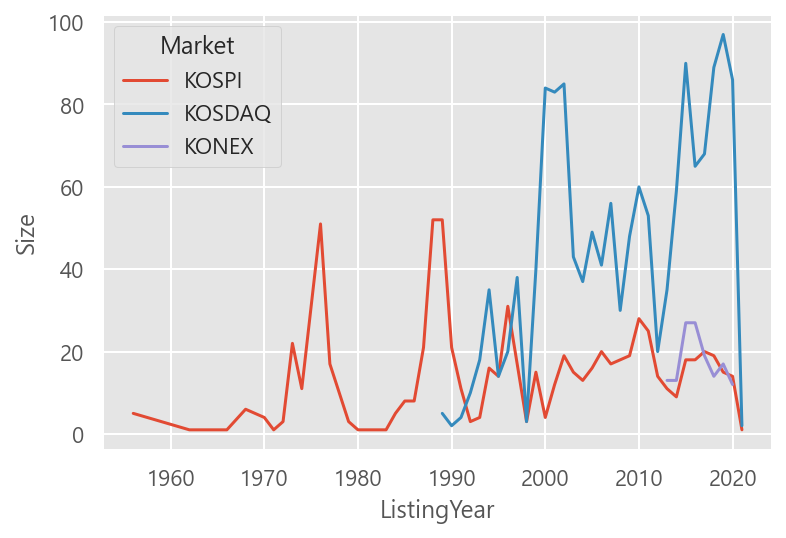

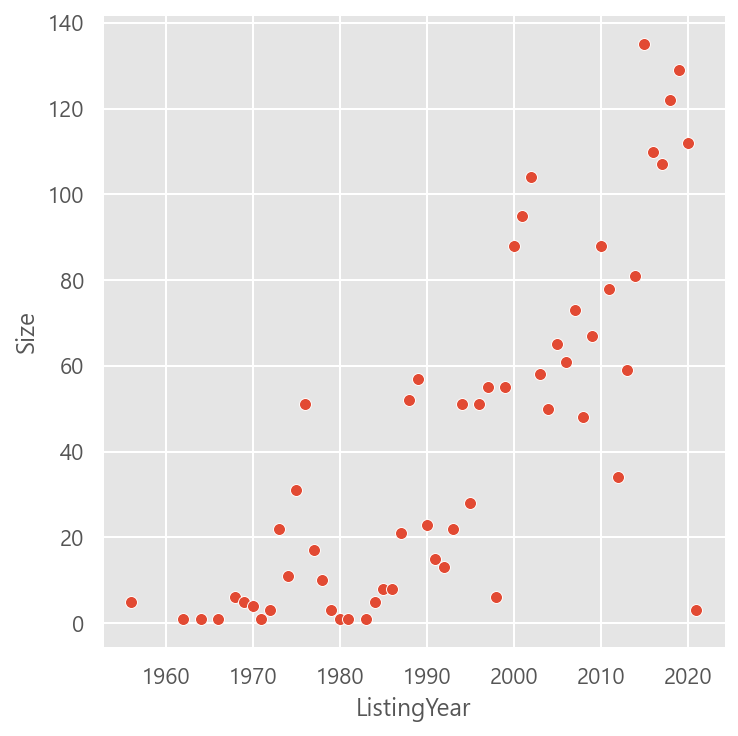

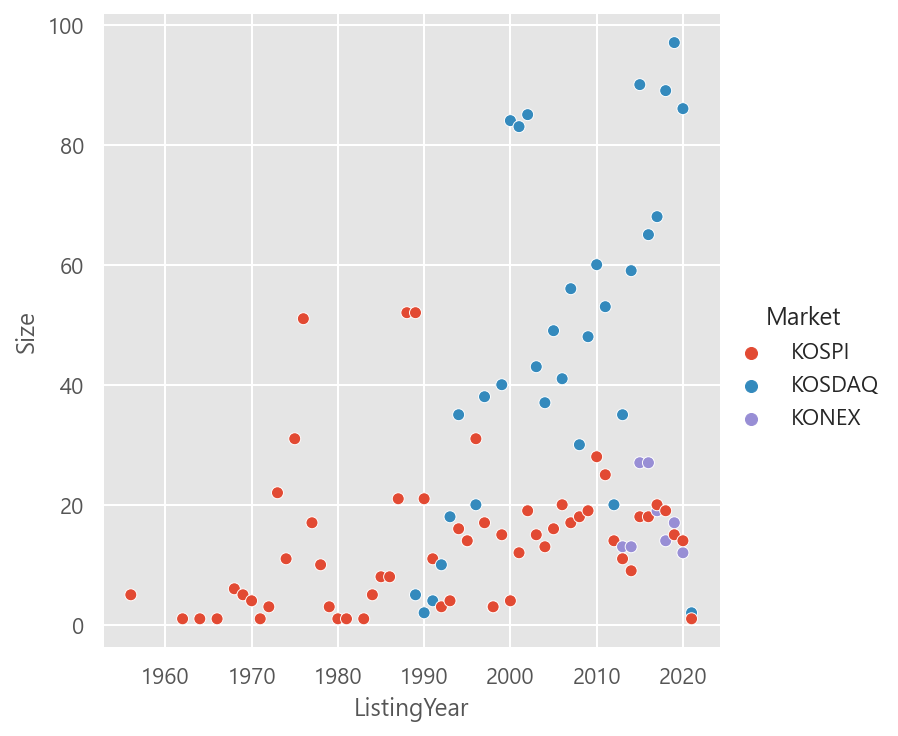

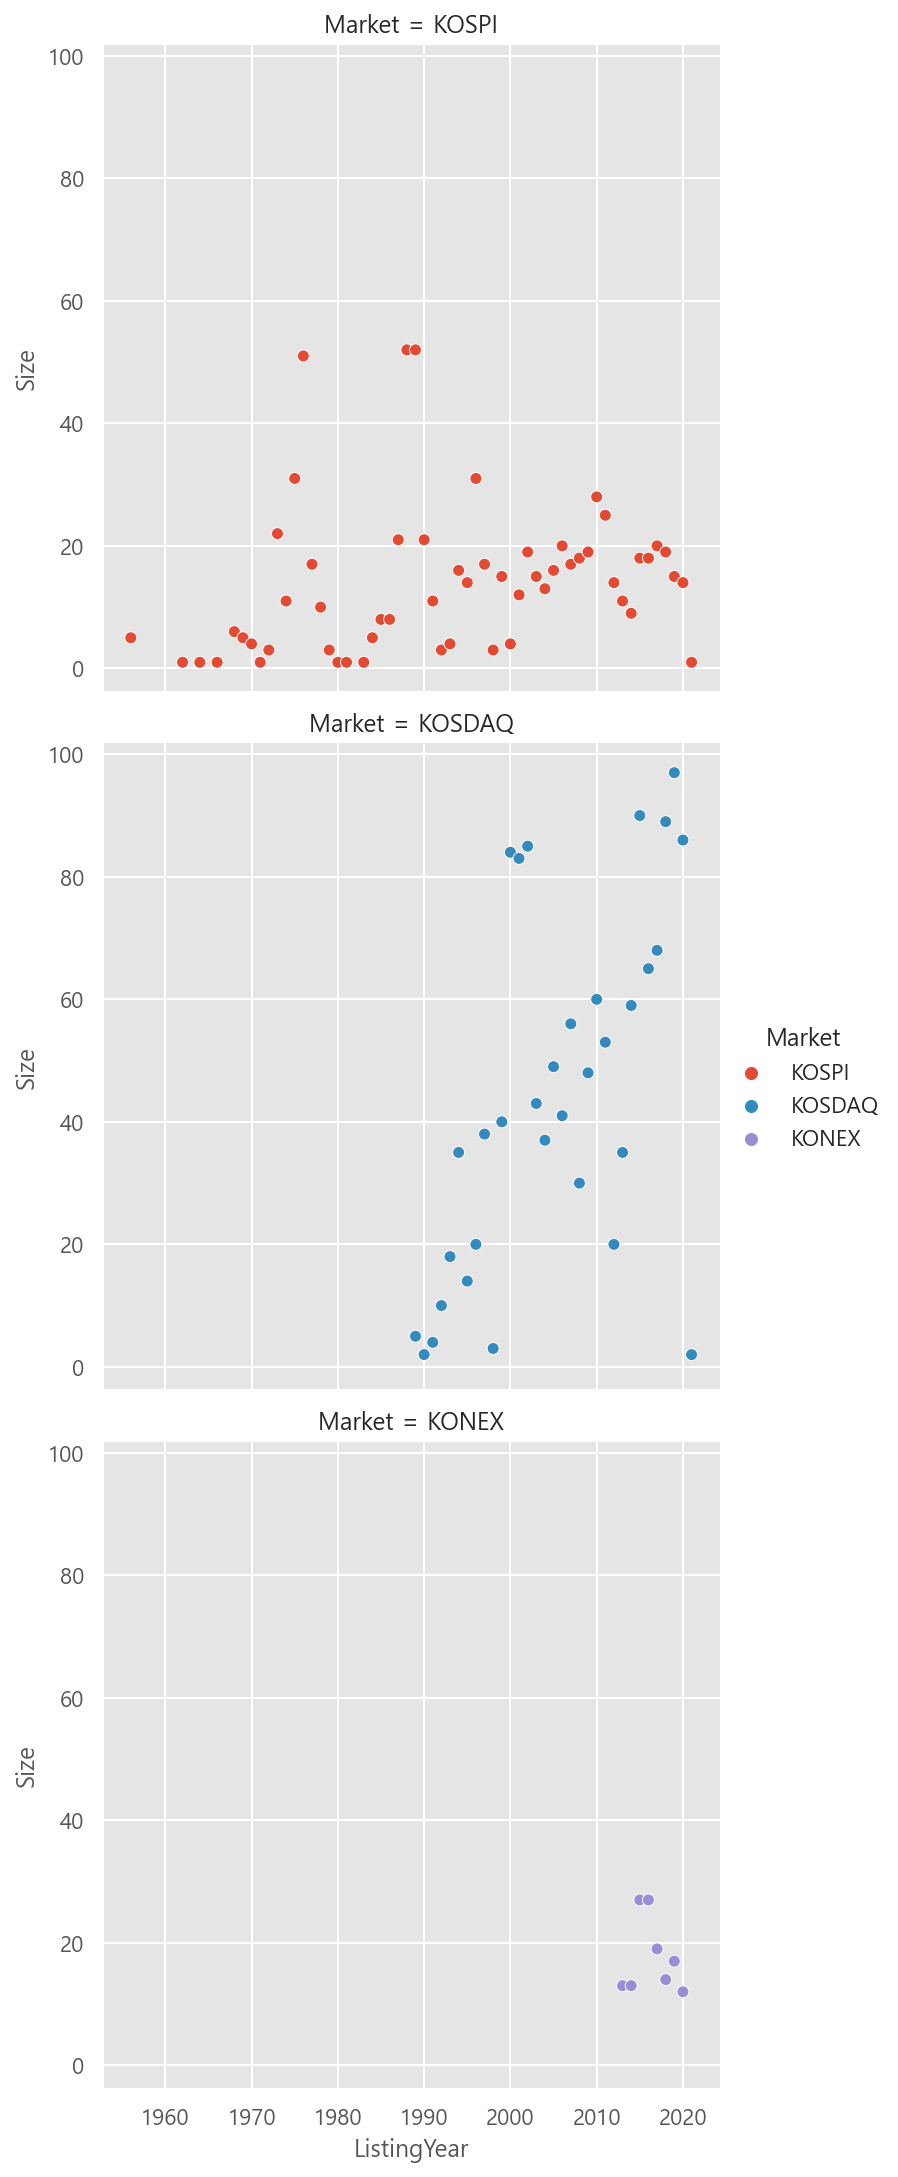

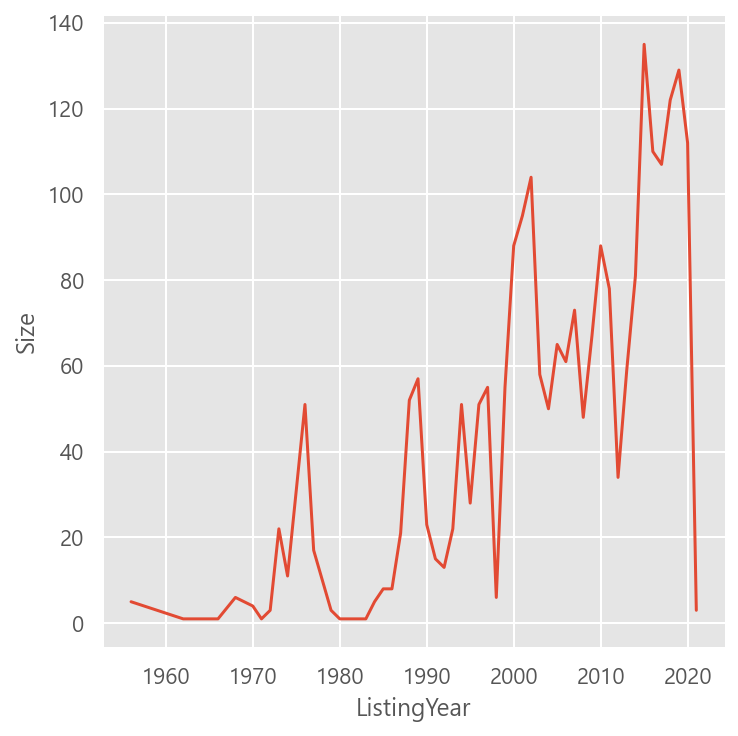

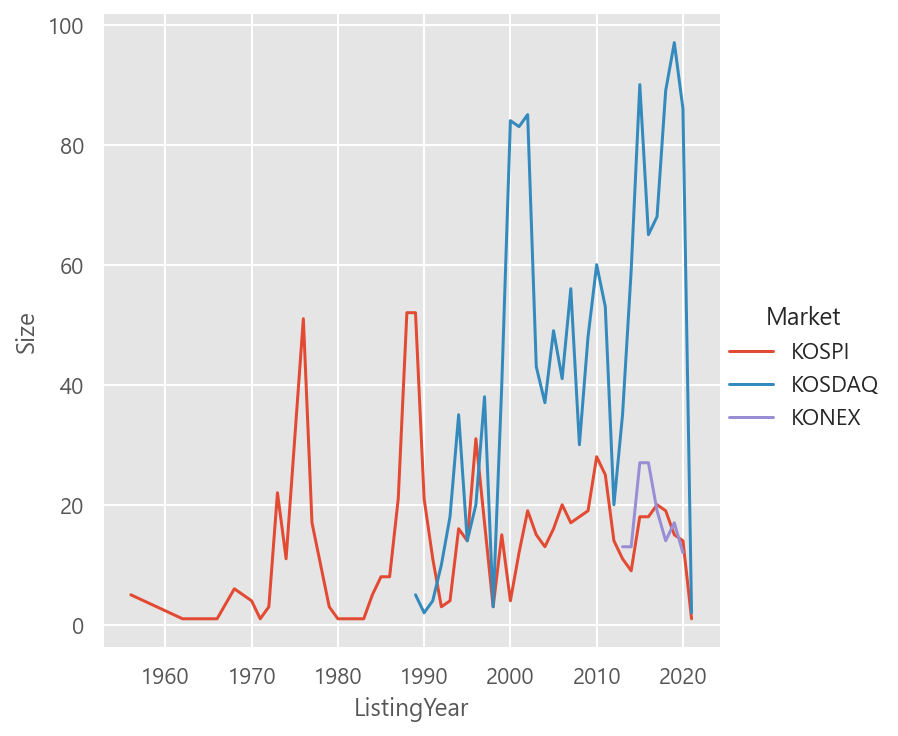

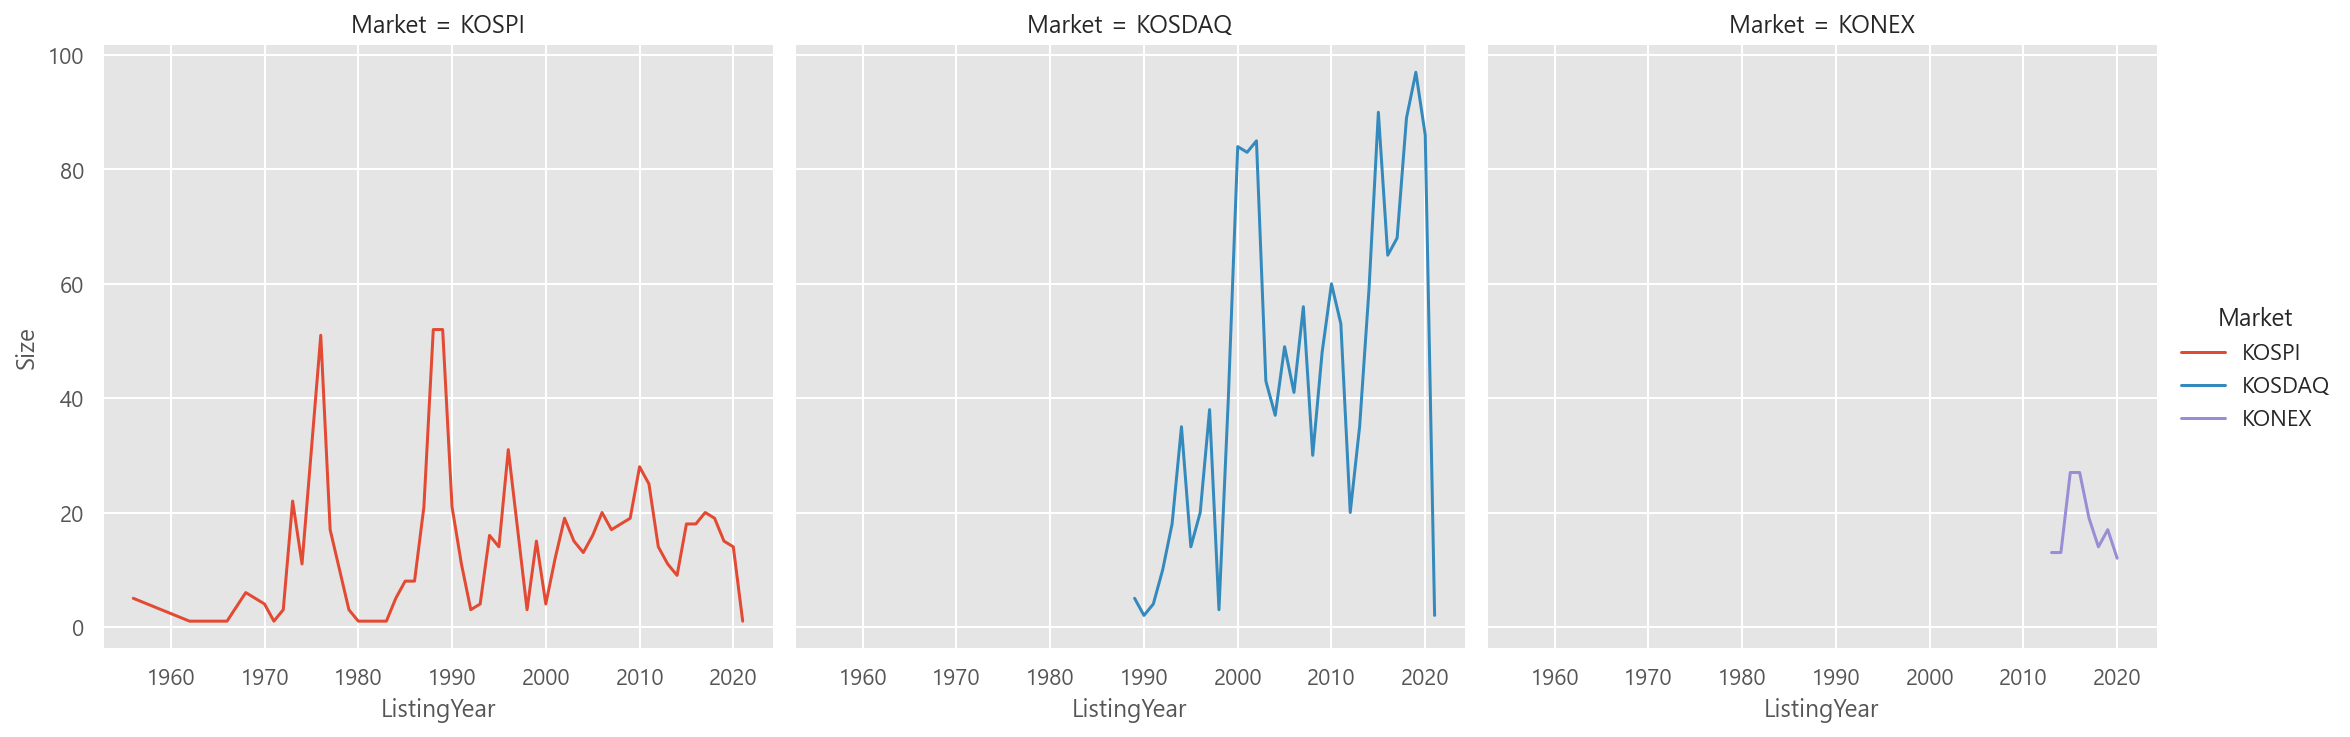

In [14]:
# 두 개의 변수 빈도수 구하고 시각화 하기
## 지역별 상장 시장 종목 빈도수 구하기
print(pd.crosstab(krx["Region"], krx["Market"]))
sns.countplot(x="Region", hue="Market", data=krx)
plt.show()

## 연도별 상장 종목 빈도수 분석
## 아래 시각화에서 사용할 df임
listingyear_market_ct = pd.crosstab(krx["ListingYear"], krx["Market"])
print(listingyear_market_ct)

## seaborn을 통한 빈도수 시각화
sns.countplot(x="ListingYear", hue="Market", data=krx)
plt.show()

## Pandas를 통한 시각화
listingyear_market_ct.plot()
plt.show()
listingyear_market_ct.plot(subplots=True)
plt.show()
listingyear_market_ct.plot(kind="bar")
plt.show()
listingyear_market_ct.plot(kind="barh")
plt.show()
listingyear_market_ct.index = listingyear_market_ct.index.astype(int)
print(listingyear_market_ct.index)
listingyear_market_ct.plot(kind="bar")
plt.show()

## groupby 와 pivot_table로 빈도수 구하기
year_groupby = krx.groupby(["ListingYear"]).size().reset_index()
year_groupby.rename(columns={0: "Size"}, inplace=True)
print(year_groupby)
year_market_groupby = krx.groupby(["ListingYear", "Market"]).size().reset_index()
year_market_groupby.rename(columns={0: "Size"}, inplace=True)
print(year_market_groupby)
year_pivot = pd.pivot_table(krx, index="ListingYear", aggfunc="size")
print(year_pivot)
year_market_pivot = pd.pivot_table(krx, index=["ListingYear", "Market"], aggfunc="size")
print(year_market_pivot)

sns.scatterplot(x="ListingYear", y="Size", data=year_groupby)
plt.show()
sns.scatterplot(x="ListingYear", hue="Market", y="Size", data=year_market_groupby)
plt.show()
sns.lineplot(x="ListingYear", y="Size", data=year_groupby)
plt.show()
sns.lineplot(x="ListingYear", hue="Market", y="Size", data=year_market_groupby)
plt.show()
sns.relplot(x="ListingYear", y="Size", data=year_groupby)
plt.show()
sns.relplot(x="ListingYear", hue="Market", y="Size", data=year_market_groupby)
plt.show()
sns.relplot(x="ListingYear", hue="Market", y="Size", data=year_market_groupby, row="Market")
plt.show()
sns.relplot(x="ListingYear", y="Size", data=year_groupby, kind="line")
plt.show()
sns.relplot(x="ListingYear", hue="Market", y="Size", data=year_market_groupby, kind="line")
plt.show()
sns.relplot(x="ListingYear", hue="Market", y="Size", data=year_market_groupby, col="Market", kind="line")
plt.show()

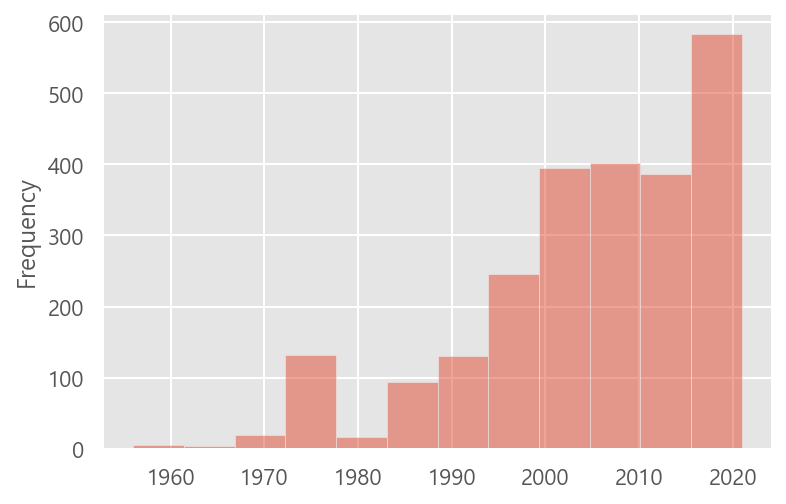

In [15]:
## 구간화 binnig 과 히스토그램
krx["ListingYear"].plot.hist(bins=12, alpha=0.5)
plt.show()

## 데이터 색인

      Symbol  Market      Name   Sector  \
1871  900280  KOSDAQ     골든센츄리   기타 금융업   
1906  900070  KOSDAQ    글로벌에스엠   기타 금융업   
3664  900120  KOSDAQ    씨케이에이치   기타 금융업   
3920  900140   KOSPI  엘브이엠씨홀딩스  자동차 판매업   
4565  900250  KOSDAQ   크리스탈신소재   기타 금융업   

                                    Industry ListingDate SettleMonth  \
1871                            트랙터용 휠 및 타이어  2016-10-19         12월   
1906  자회사 제품 : IT기기용 정밀 화스너부품(스크류, 샤프트, 스프링)  2009-12-23         12월   
3664                                  건강보조식품  2010-03-31         06월   
3920                                    지주회사  2010-11-30         12월   
4565                     합성운모 플레이크, 파우더, 테이프  2016-01-28         12월   

               Representative                           HomePage  Region  \
1871                      주승화         http://www.jsj-wheel.co.kr  케이맨 제도   
1906                      나윤복        http://www.globalsmtech.com  케이맨 제도   
3664                      린진성                                NaN  케이맨 제도   
3920

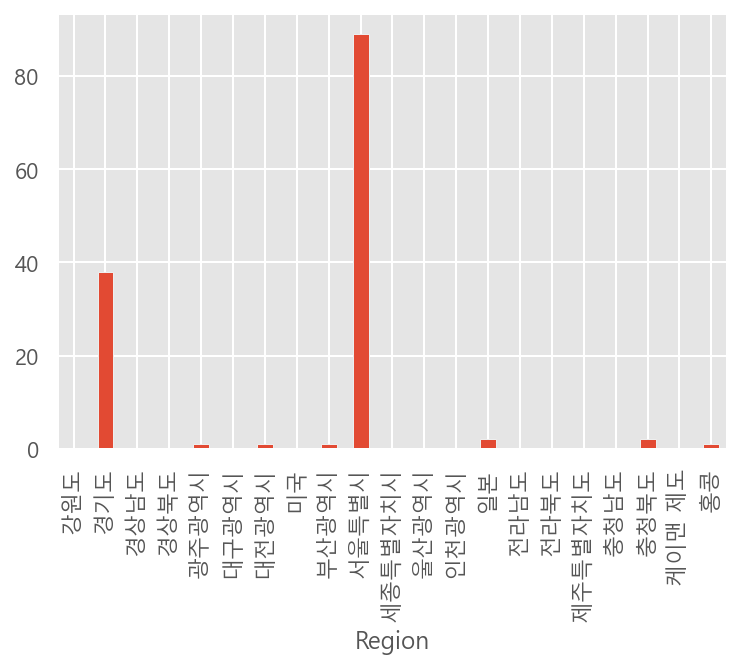

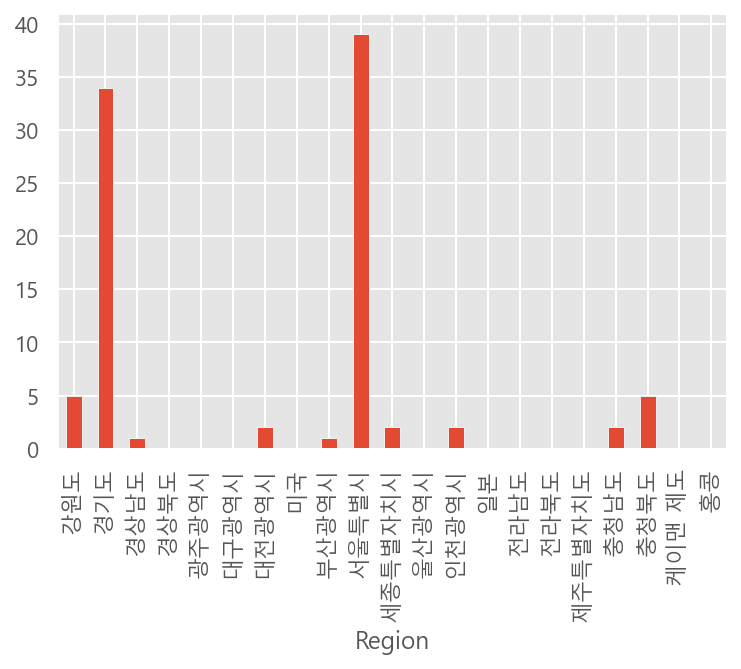

Region       강원도  경기도
Sector               
1차 비철금속 제조업    0    7
1차 철강 제조업      0    4
가구 제조업         0    4


In [17]:
print(krx[ krx["Region"] == "케이맨 제도" ])
print(krx[ krx["ListingYear"] < 1970 ])
krx_cond = (krx["ListingYear"] == 2020) & (krx["Region"] == "서울특별시") & (krx["Market"] == "KOSPI")
print(krx[ krx_cond ])

## 지역별 섹터
krx_ct = pd.crosstab(krx["Sector"], krx["Region"])
print(krx_ct)

## 컬럼과 인덱스 값으로 색인하기
print(krx[["Name", "Sector", "ListingYear"]])

## 특정 행만 가져오기
print(krx_ct.loc["소프트웨어 개발 및 공급업"])
print(krx_ct.loc[["소프트웨어 개발 및 공급업", "금융 지원 서비스업", "의약품 제조업"]])
print(krx_ct.loc[["소프트웨어 개발 및 공급업", "금융 지원 서비스업", "의약품 제조업"], "서울특별시"])
print(krx_ct.loc[["소프트웨어 개발 및 공급업", "금융 지원 서비스업", "의약품 제조업"], ["서울특별시", "대구광역시"]])
krx_ct.loc["소프트웨어 개발 및 공급업"].plot(kind="bar")
plt.show()
krx_ct.loc["의약품 제조업"].plot(kind="bar")
plt.show()
print(krx_ct.iloc[range(0,3), [0,1]])